In [1]:
import sys
from pathlib import Path
import fnmatch
import os
import io

import numpy as np
import matplotlib.pyplot as plt

from opticalglass import rindexinfo
from opticalglass.rindexinfo import summary_plots
from opticalglass import util

# Get a list of all the Yaml files under the database root

In [2]:
db_root = '/Users/Mike/Developer/PyProjects/refractiveindexinfo/database'

In [3]:
os.getcwd()

'/Users/Mike/Developer/PyProjects/opticalglass/notebooks'

In [4]:
os.chdir(db_root)

In [5]:
log = []

# Redirect stderr
class writer(io.TextIOBase):
    def write(self, data):
        log.append(data)
        return len(data)

sys.stderr = writer()

In [6]:
files = []
for root, dirnames, filenames in os.walk(db_root):
    for filename in fnmatch.filter(filenames, '*.yml'):
        files.append(os.path.join(root, filename))

In [7]:
len(files)

2827

In [8]:
type(files[11])

str

In [9]:
polycarb_url = 'https://refractiveindex.info/database/data/organic/(C16H14O3)n%20-%20polycarbonate/Zhang.yml'
polycarb_url_yaml_pkg = rindexinfo.read_rii_url(polycarb_url)

In [10]:
type(polycarb_url_yaml_pkg), len(polycarb_url_yaml_pkg), polycarb_url_yaml_pkg[1], polycarb_url_yaml_pkg[2]

(tuple, 3, '(C16H14O3)n - polycarbonate [Zhang]', 'rii-organic')

In [11]:
polycarb_file = files[11]
polycarb_Path = Path(polycarb_file)
polycarb_file_yaml_pkg = rindexinfo.read_rii_file(polycarb_Path)
print(polycarb_file)

/Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data/organic/(C16H14O3)n - polycarbonate/Zhang.yml


['tabulated nk']


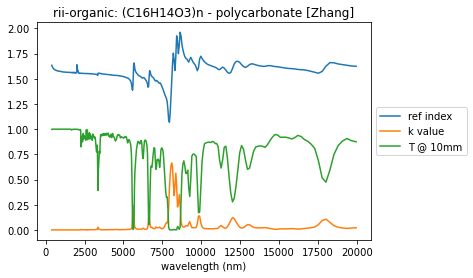

In [12]:
polycarb_yaml, name, catalog = polycarb_file_yaml_pkg
polycarb = rindexinfo.create_material(polycarb_yaml, name, catalog)
summary_plots(polycarb, polycarb_yaml)

In [13]:
[d['type'] for d in polycarb_yaml['DATA']]

['tabulated nk']

In [14]:
for i, filename in enumerate(files[1:], start=1):
    try:
        matl_yaml, name, catalog = rindexinfo.read_rii_file(Path(filename))
    except Exception as err:
        print(f"{err}: file read exception, {i}: {filename[62:]}")
    else:
        try:
            matl = rindexinfo.create_material(matl_yaml, f'{name}', 'rii'+catalog)
        except Exception as err:
            data_types = f"{[d['type'] for d in matl_yaml['DATA']]}"
            print(f"{err}: create_material exception, {i}: {filename[62:]}, {data_types}")

data/organic/(C2ClF3)n - polychlorotrifluoroethylene/Smith.yml
['tabulated nk']


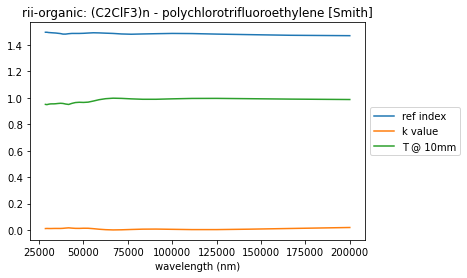

In [15]:
filename = files[43]
yaml, name, catalog = rindexinfo.read_rii_file(Path(filename))
matl = rindexinfo.create_material(yaml, name, catalog)

print(filename[62:])
summary_plots(matl, yaml)

data/main/Si/Edwards.yml
['formula 7']


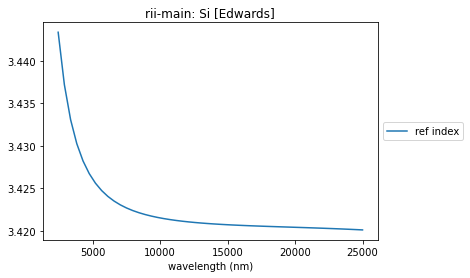

In [16]:
filename = files[2467]
yaml, name, catalog = rindexinfo.read_rii_file(Path(filename))
try:
    matl = rindexinfo.create_material(yaml, name, catalog)
except Exception as err:
    print(f"{err}")

print(filename[62:])
summary_plots(matl, yaml)

In [17]:
yaml

{'REFERENCES': 'D. F. Edwards and E. Ochoa , Infrared Refractive Indexes of Silicon, <a href="https://doi.org/10.1364/AO.19.004130"><i>Appl. Opt.</i>, <b>19</b>, 4130-4131 (1980)</a>',
 'COMMENTS': '26 °C, crystal orientation <111>; 3-4 Ω-cm, n-type (phosporous-dopped)',
 'DATA': [{'type': 'formula 7',
   'wavelength_range': '2.4373 25',
   'coefficients': '3.41983 0.159906 -0.123109 1.26878E-6 -1.95104E-9'}]}

data/organic/CH4N2O - urea/Rosker-e.yml
['formula 9']


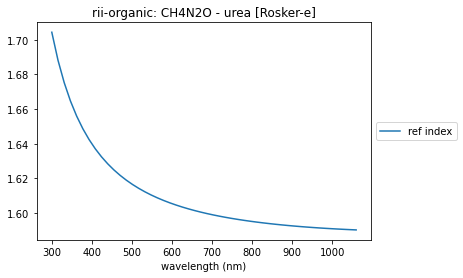

In [18]:
filename = files[134]
yaml, name, catalog = rindexinfo.read_rii_file(Path(filename))
try:
    matl = rindexinfo.create_material(yaml, name, catalog)
except Exception as err:
    print(f"{err}")

print(filename[62:])
summary_plots(matl, yaml)

In [19]:
yaml

{'REFERENCES': 'M. J. Rosker, K. Cheng, and C. L. Tang, Practical urea optical parametric oscillator for tunable generation throughout the visible and near-infrared, <a href="https://doi.org/10.1109/JQE.1985.1072557"><i>IEEE J. Quant. Electron.</i> <b>21</b> 1600-1606 (1985)</a>',
 'DATA': [{'type': 'formula 9',
   'wavelength_range': '0.3 1.06',
   'coefficients': '2.51527 0.0240 0.0300 0.020 1.52 0.8771'}],
 'COMMENTS': 'Room temperature. Extraordinary ray (e).'}

data/main/AgBr/Schroter.yml
['formula 8']


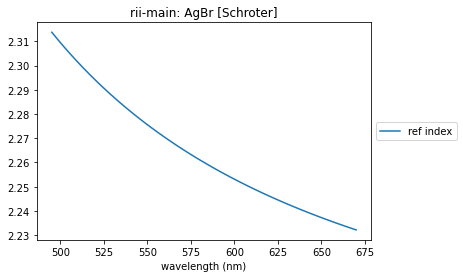

In [20]:
filename = files[2174]
yaml, name, catalog = rindexinfo.read_rii_file(Path(filename))
try:
    matl = rindexinfo.create_material(yaml, name, catalog)
except Exception as err:
    print(f"{err}")

print(filename[62:])
summary_plots(matl, yaml)

In [21]:
vars(matl)

{'coefs': array([ 4.52505e-01,  9.93900e-02,  7.05370e-02, -1.50000e-04]),
 'rndx_fct': <function opticalglass.rindexinfo.eval_formula_8(wv_nm, coeff, data_range=None)>,
 'data_range': array([0.495, 0.67 ]),
 'wvls': array([495.        , 498.57142857, 502.14285714, 505.71428571,
        509.28571429, 512.85714286, 516.42857143, 520.        ,
        523.57142857, 527.14285714, 530.71428571, 534.28571429,
        537.85714286, 541.42857143, 545.        , 548.57142857,
        552.14285714, 555.71428571, 559.28571429, 562.85714286,
        566.42857143, 570.        , 573.57142857, 577.14285714,
        580.71428571, 584.28571429, 587.85714286, 591.42857143,
        595.        , 598.57142857, 602.14285714, 605.71428571,
        609.28571429, 612.85714286, 616.42857143, 620.        ,
        623.57142857, 627.14285714, 630.71428571, 634.28571429,
        637.85714286, 641.42857143, 645.        , 648.57142857,
        652.14285714, 655.71428571, 659.28571429, 662.85714286,
        666.4285

In [22]:
matl.rindex(500)

2.3094520454859557

data/organic/C7H17O3P - diisopropyl methylphosphonate/Querry-IR.yml
['tabulated nk']


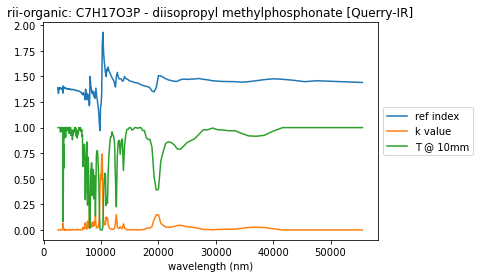

In [23]:
filename = files[33]
yaml, name, catalog = rindexinfo.read_rii_file(Path(filename))
try:
    matl = rindexinfo.create_material(yaml, name, catalog)
except Exception as err:
    print(f"{err}")
print(filename[62:])
summary_plots(matl, yaml)

data/main/In/Golovashkin-295K.yml
['tabulated nk']


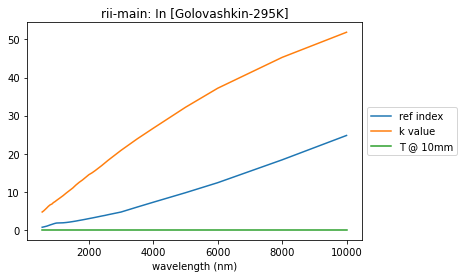

In [24]:
filename = files[2208]
yaml, name, catalog = rindexinfo.read_rii_file(Path(filename))
try:
    matl = rindexinfo.create_material(yaml, name, catalog)
except Exception as err:
    print(f"{err}")
print(filename[62:])
summary_plots(matl, yaml)

data/organic/(C2ClF3)n - polychlorotrifluoroethylene/Smith.yml
['tabulated nk']


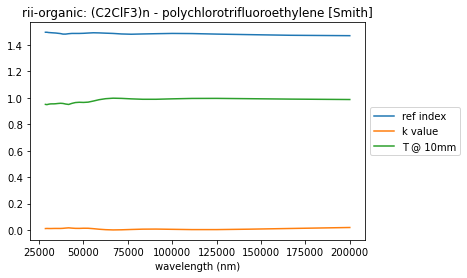

In [25]:
filename = files[43]
yaml, name, catalog = rindexinfo.read_rii_file(Path(filename))
try:
    matl = rindexinfo.create_material(yaml, name, catalog)
except Exception as err:
    print(f"{err}")
print(filename[62:])
summary_plots(matl, yaml)

In [26]:
yaml

{'REFERENCES': 'D. R. Smith and E. V. Loewenstein. Optical constants of far infrared materials. 3: plastics, <a href="https://doi.org/10.1364/AO.14.001335"><i>Appl. Opt.</i> <b>14</b>, 1335-1341 (1975)</a>',
 'COMMENTS': 'Manufactured by Allied Chemical under the name Aclar.',
 'DATA': [{'type': 'tabulated nk',
   'data': '28.5714 1.497 0.0114\n29.4118 1.497 0.0122\n30.3030 1.495 0.0118\n31.2500 1.494 0.0116\n32.2581 1.493 0.0118\n33.3333 1.492 0.0122\n34.4828 1.491 0.0123\n35.7143 1.489 0.0122\n37.0370 1.487 0.0122\n38.4615 1.483 0.0131\n40.0000 1.483 0.0151\n41.6667 1.486 0.0168\n43.4783 1.488 0.0146\n45.4545 1.488 0.0129\n47.6190 1.488 0.0127\n50.0000 1.489 0.0138\n52.6316 1.491 0.0136\n55.5556 1.493 0.0106\n58.8235 1.492 0.00632\n62.5000 1.490 0.0029\n66.6667 1.488 0.0011\n71.4286 1.484 0.0020\n76.9231 1.482 0.0044\n83.3333 1.484 0.00683\n90.9091 1.486 0.00745\n100.0000 1.488 0.0056\n111.1111 1.487 0.0035\n125.0000 1.483 0.0035\n142.8571 1.479 0.0066\n166.6667 1.474 0.012\n200.0000

In [27]:
vars(matl)

{'label': '(C2ClF3)n - polychlorotrifluoroethylene [Smith]',
 '_catalog': 'rii-organic',
 'wvls': array([ 28571.4,  29411.8,  30303. ,  31250. ,  32258.1,  33333.3,
         34482.8,  35714.3,  37037. ,  38461.5,  40000. ,  41666.7,
         43478.3,  45454.5,  47619. ,  50000. ,  52631.6,  55555.6,
         58823.5,  62500. ,  66666.7,  71428.6,  76923.1,  83333.3,
         90909.1, 100000. , 111111.1, 125000. , 142857.1, 166666.7,
        200000. ]),
 'rndx': array([1.497, 1.497, 1.495, 1.494, 1.493, 1.492, 1.491, 1.489, 1.487,
        1.483, 1.483, 1.486, 1.488, 1.488, 1.488, 1.489, 1.491, 1.493,
        1.492, 1.49 , 1.488, 1.484, 1.482, 1.484, 1.486, 1.488, 1.487,
        1.483, 1.479, 1.474, 1.471]),
 'kvals': array([0.0114 , 0.0122 , 0.0118 , 0.0116 , 0.0118 , 0.0122 , 0.0123 ,
        0.0122 , 0.0122 , 0.0131 , 0.0151 , 0.0168 , 0.0146 , 0.0129 ,
        0.0127 , 0.0138 , 0.0136 , 0.0106 , 0.00632, 0.0029 , 0.0011 ,
        0.002  , 0.0044 , 0.00683, 0.00745, 0.0056 , 0.0035 , 

# PEDOT

In [28]:
pedot_filename = files[239]
pedot_filename

'/Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data/other/mixed organic/PEDOT-PSS/Chen.yml'

['tabulated n', 'tabulated k']


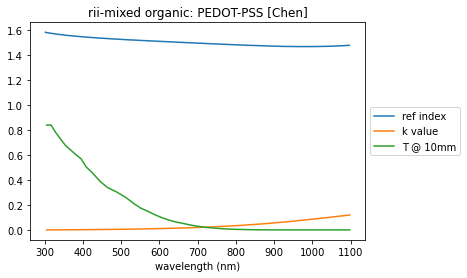

In [29]:
pedot_yaml, name, catalog = rindexinfo.read_rii_file(Path(pedot_filename))
pedot = rindexinfo.create_material(pedot_yaml, name, catalog)
summary_plots(pedot, pedot_yaml)

# CCl4 - carbon tetrachloride

In [30]:
filename = files[108]
filename

'/Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data/organic/CCl4 - carbon tetrachloride/Moutzouris.yml'

['formula 3']


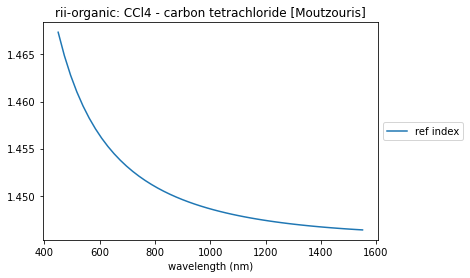

In [31]:
CCl4_yaml, name, catalog = rindexinfo.read_rii_file(Path(filename))
CCl4 = rindexinfo.create_material(CCl4_yaml, name, catalog)
summary_plots(CCl4, CCl4_yaml)

# F1 LZOS

In [32]:
filename = files[375]
filename

'/Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data/glass/lzos/F1.yml'

['tabulated n']


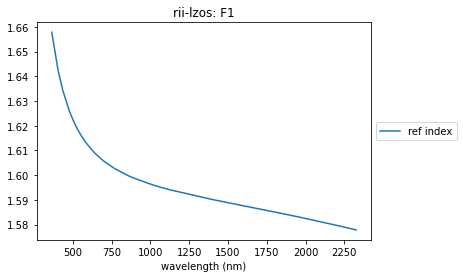

In [33]:
F1_yaml, name, catalog = rindexinfo.read_rii_file(Path(filename))
F1 = rindexinfo.create_material(F1_yaml, name, catalog)
summary_plots(F1, F1_yaml)

In [34]:
vars(F1)

{'label': 'F1',
 '_catalog': 'rii-lzos',
 'wvls': array([ 365.  ,  404.66,  435.83,  479.99,  486.13,  488.  ,  514.  ,
         520.8 ,  530.  ,  546.07,  568.2 ,  587.56,  589.29,  632.8 ,
         643.85,  647.1 ,  656.27,  694.3 ,  706.52,  768.2 ,  852.1 ,
         890.  , 1013.9 , 1060.  , 1128.6 , 1395.1 , 1529.6 , 1813.1 ,
        1970.1 , 2249.3 , 2325.4 ]),
 'rndx': array([1.65782 , 1.64269 , 1.634312, 1.625647, 1.624657, 1.62436 ,
        1.62066 , 1.61979 , 1.61868 , 1.616878, 1.61467 , 1.612945,
        1.6128  , 1.60955 , 1.608833, 1.60863 , 1.608067, 1.60597 ,
        1.60537 , 1.60273 , 1.59994 , 1.59889 , 1.59609 , 1.59522 ,
        1.59404 , 1.59021 , 1.5885  , 1.58493 , 1.58289 , 1.57899 ,
        1.57785 ]),
 'kvals': None,
 'kvals_wvls': None,
 'rindex_interp': <scipy.interpolate._interpolate.interp1d at 0x7fecc1b3aa90>,
 'kvals_interp': None}

# MgF2

In [35]:
filename = files[2234]
filename

'/Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data/main/MgF2/Li-e.yml'

['formula 1']


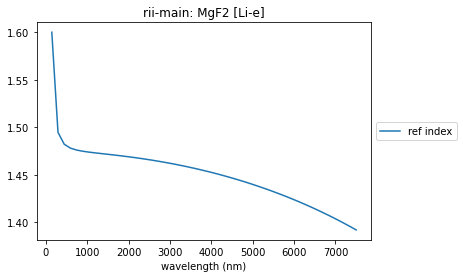

In [36]:
MgF2_yaml, name, catalog = rindexinfo.read_rii_file(Path(filename))
MgF2 = rindexinfo.create_material(MgF2_yaml, name, catalog)
summary_plots(MgF2, MgF2_yaml)

# KNbO3

In [37]:
filename = files[2173]
filename

'/Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data/main/KNbO3/Umemura-alpha.yml'

['formula 4']


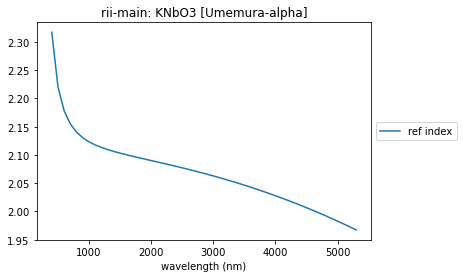

In [38]:
KNbO3_yaml, name, catalog = rindexinfo.read_rii_file(Path(filename))
KNbO3 = rindexinfo.create_material(KNbO3_yaml, name, catalog)
summary_plots(KNbO3, KNbO3_yaml)

In [39]:
KNbO3.data_range

array([0.4, 5.3])

In [40]:
KNbO3_yaml

{'REFERENCES': 'N. Umemura, K. Yoshida, and K. Kato. Phase-matching properties of KNbO<sub>3</sub> in the mid-infrared, <a href="    https://doi.org/10.1364/AO.38.000991"><i>Appl Opt.</i> <b>38</b>, 991-994 (1999)</a>',
 'COMMENTS': 'n<sub>α</sub>; 22 °C.',
 'DATA': [{'type': 'formula 4',
   'wavelength_range': '0.40 5.3',
   'coefficients': '4.4222 0.09972 0 0.05496 1 0 0 0 1 -0.01976 2'}]}

In [41]:
KNbO3.coefs

array([ 4.4222 ,  0.09972,  0.     ,  0.05496,  1.     ,  0.     ,
        0.     ,  0.     ,  1.     , -0.01976,  2.     ])

In [42]:
len(KNbO3.coefs)

11

# Liquid crystal MLC-6608

In [43]:
filename = files[260]
filename

'/Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data/other/liquid crystals/MLC-6608/Li-o.yml'

['formula 5']


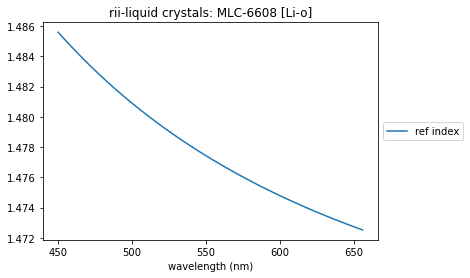

In [44]:
LC_yaml, name, catalog = rindexinfo.read_rii_file(Path(filename))
LC = rindexinfo.create_material(LC_yaml, name, catalog)
summary_plots(LC, LC_yaml)

In [45]:
LC.data_range

array([0.45 , 0.656])

In [46]:
2373

2373

# CdS

In [47]:
filename = files[2373]
filename

'/Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data/main/CdS/Bieniewski-o.yml'

['formula 4']


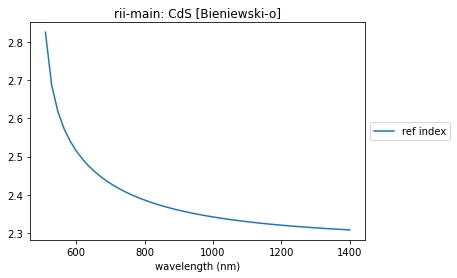

In [48]:
CdS_yaml, name, catalog = rindexinfo.read_rii_file(Path(filename))
CdS = rindexinfo.create_material(CdS_yaml, name, catalog)
summary_plots(CdS, CdS_yaml)

In [49]:
CdS.data_range

array([0.51, 1.4 ])

In [50]:
CdS.coefs

array([5.1792  , 0.23504 , 0.      , 0.083591, 1.      , 0.036927,
       0.      , 0.23504 , 1.      ])

In [51]:
CdS_yaml['REFERENCES']

'1) T. M. Bieniewski and S. J. Czyzak. Refractive indexes of single hexagonal ZnS and CdS crystals, <a href="https://doi.org/10.1364/JOSA.53.000496"><i>J. Opt. Soc. Am.</i> <b>53</b>, 496-497 (1963)</a><br>2) M. Sanchez Gomez, J. M. Guerra, and F. Vilches. Weighted nonlinear regression analysis of a Sellmeier expansion: comparison of several nonlinear fits of CdS dispersion, <a href="https://doi.org/10.1364/AO.24.001147"><i>Appl. Opt.</i> <b>24</b>, 1147-1150 (1985)</a></br>* Ref. 2 provides a dispersion formula based on data from ref. 1'